In [106]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt4
from alpaca_trade_api.rest import REST
#Env is in Alpaca 

In [2]:
load_dotenv()

True

In [36]:
quiver_api_key = os.getenv("QUIVERQUANT_API_KEY")
API_KEYS = os.getenv('ALPACA_API_KEY')
API_SEC_KEY = os.getenv('ALPACA_SECRET_KEY')

In [4]:
import requests
quiverquant_url = "https://api.quiverquant.com/beta/live/housetrading"
headers = {'accept': 'application/json',
'X-CSRFToken': 'TyTJwjuEC7VV7mOqZ622haRaaUr0x0Ng4nrwSRFKQs7vdoBcJlK9qjAS69ghzhFu',
'Authorization': f'Token {quiver_api_key}'}
r = requests.get(quiverquant_url, headers=headers).json()
print(r)

[{'Ticker': 'TPCO', 'Date': '2021-05-27', 'Representative': ' Virginia Foxx', 'Transaction': 'Sale', 'Amount': 15001.0, 'Range': '$15,001-$50,000'}, {'Ticker': 'SWK', 'Date': '2021-05-27', 'Representative': ' David B. Mckinley', 'Transaction': 'Purchase', 'Amount': 1001.0, 'Range': '$1,001-$15,000'}, {'Ticker': 'NHI', 'Date': '2021-05-27', 'Representative': ' Virginia Foxx', 'Transaction': 'Purchase', 'Amount': 15001.0, 'Range': '$15,001-$50,000'}, {'Ticker': 'NFLX', 'Date': '2021-05-27', 'Representative': ' David B. Mckinley', 'Transaction': 'Sale', 'Amount': 1001.0, 'Range': '$1,001-$15,000'}, {'Ticker': 'STM', 'Date': '2021-05-25', 'Representative': ' Bob Gibbs', 'Transaction': 'Purchase', 'Amount': 1001.0, 'Range': '$1,001-$15,000'}, {'Ticker': 'AEP', 'Date': '2021-05-25', 'Representative': ' Bob Gibbs', 'Transaction': 'Sale', 'Amount': 1001.0, 'Range': '$1,001-$15,000'}, {'Ticker': 'STM', 'Date': '2021-05-25', 'Representative': ' Bob Gibbs', 'Transaction': 'Purchase', 'Amount': 10

In [5]:
df = pd.DataFrame(r)
df['Range'] = df['Range'].str.replace('$', '')
df.head()

,Ticker,Date,Representative,Transaction,Amount,Range
0,TPCO,2021-05-27,Virginia Foxx,Sale,15001.0,"15,001-50,000"
1,SWK,2021-05-27,David B. Mckinley,Purchase,1001.0,"1,001-15,000"
2,NHI,2021-05-27,Virginia Foxx,Purchase,15001.0,"15,001-50,000"
3,NFLX,2021-05-27,David B. Mckinley,Sale,1001.0,"1,001-15,000"
4,STM,2021-05-25,Bob Gibbs,Purchase,1001.0,"1,001-15,000"


In [208]:
for name in df['Representative']:
    name = name.strip()

In [211]:
df2 = df.head()

In [238]:
# tsla_df = pd.DataFrame(df2[df2['Ticker']=="TSLA"]).groupby(['Ticker', 'Representative','Transaction']).mean()
# tsla_df.plot(figsize = [20,10])

In [239]:
df2 = df.set_index('Representative')
tsla_df = pd.DataFrame(df2[df2['Ticker']=="TSLA"])
tsla_df.head()

,Ticker,Date,Transaction,Amount,Range
Representative,,,,,
Josh Gottheimer,TSLA,2021-04-30,Sale,1001.0,"1,001-15,000"
Michael Garcia,TSLA,2021-04-28,Purchase,15001.0,"15,001-50,000"
Marie Newman,TSLA,2021-04-22,Sale,50001.0,"50,001-100,000"
Marie Newman,TSLA,2021-04-19,Purchase,50001.0,"50,001-100,000"
Michael Garcia,TSLA,2021-04-12,Purchase,15001.0,"15,001-50,000"


In [303]:
tsla_sales = tsla_df[tsla_df['Transaction']=='Sale']
tsla_purchase = tsla_df[tsla_df['Transaction']=='Purchase']
tsla_df2 = pd.concat([tsla_sales,tsla_purchase])
tsla_df2.drop(['Range', 'Amount', 'Date'], axis='columns', inplace=True)
tsla_df2

,Ticker,Transaction
Representative,,
Josh Gottheimer,TSLA,Sale
Marie Newman,TSLA,Sale
Josh Gottheimer,TSLA,Sale
Marie Newman,TSLA,Sale
Marie Newman,TSLA,Sale
Ashley Hinson Arenholz,TSLA,Sale
Josh Gottheimer,TSLA,Sale
Josh Gottheimer,TSLA,Sale
Josh Gottheimer,TSLA,Sale


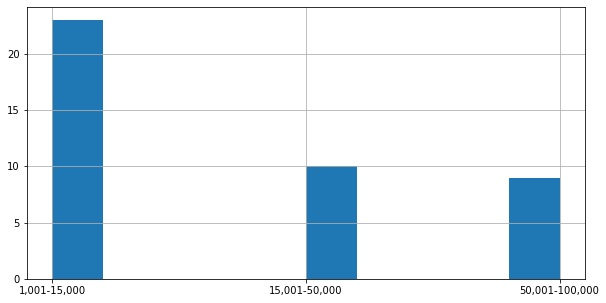

In [179]:
tsla_df.Range.hist(figsize = [10,5]);

In [290]:
jnj_df = pd.DataFrame(df2[df2['Ticker']=="JNJ"])
jnj_df.head()

,Ticker,Date,Transaction,Amount,Range
Representative,,,,,
Kathy Manning,JNJ,2021-04-30,Sale,1001.0,"1,001-15,000"
Marie Newman,JNJ,2021-04-23,Sale,15001.0,"15,001-50,000"
Marie Newman,JNJ,2021-04-13,Purchase,15001.0,"15,001-50,000"
Mr. Peter Meijer,JNJ,2021-02-16,Sale,15001.0,"15,001-50,000"
Austin Scott,JNJ,2021-01-26,Purchase,15001.0,"15,001-50,000"


In [291]:
jnj_sales = jnj_df[jnj_df['Transaction']=='Sale']
jnj_purchase = jnj_df[jnj_df['Transaction']=='Purchase']
jnj_df = pd.concat([jnj_sales,jnj_purchase])
jnj_df

,Ticker,Date,Transaction,Amount,Range
Representative,,,,,
Kathy Manning,JNJ,2021-04-30,Sale,1001.0,"1,001-15,000"
Marie Newman,JNJ,2021-04-23,Sale,15001.0,"15,001-50,000"
Mr. Peter Meijer,JNJ,2021-02-16,Sale,15001.0,"15,001-50,000"
Christopher L. Jacobs,JNJ,2021-01-04,Sale,1001.0,"1,001-15,000"
Christopher L. Jacobs,JNJ,2020-09-08,Sale,15001.0,"15,001-50,000"
William R. Timmons Iv,JNJ,2020-06-29,Sale,1001.0,"1,001-15,000"
Marie Newman,JNJ,2021-04-13,Purchase,15001.0,"15,001-50,000"
Austin Scott,JNJ,2021-01-26,Purchase,15001.0,"15,001-50,000"
Kathy Manning,JNJ,2021-01-15,Purchase,1001.0,"1,001-15,000"


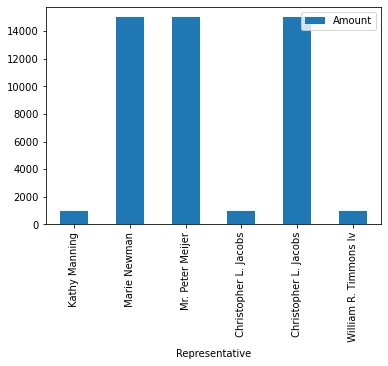

In [294]:
jnj_sales = jnj_df[jnj_df['Transaction']=='Sale'].plot.bar()

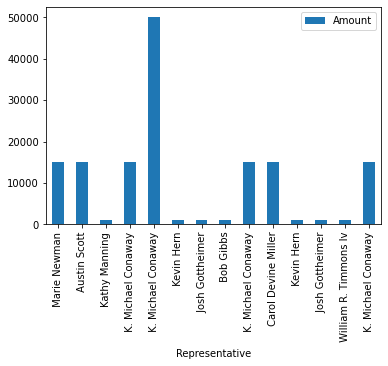

In [296]:
jnj_purchase = jnj_df[jnj_df['Transaction']=='Purchase'].plot.bar()

<AxesSubplot:xlabel='Representative'>

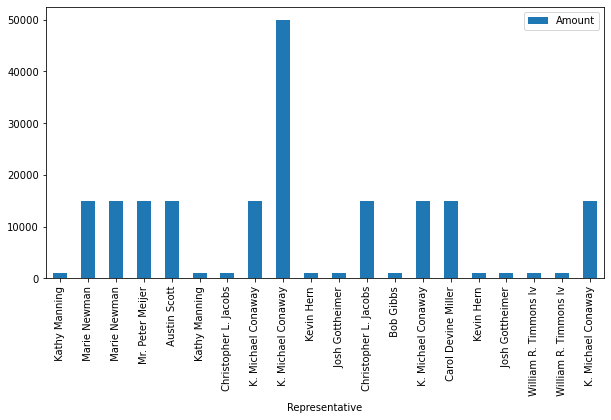

In [23]:
jnj_df.plot.bar(figsize = [10,5])

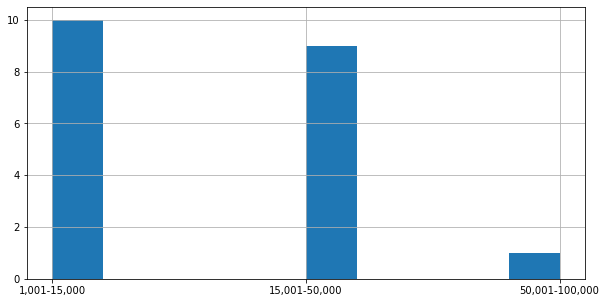

In [285]:
jnj_df.Range.hist(figsize = [10,5]);

In [27]:
spy_df = pd.DataFrame(df2[df2['Ticker']=="SPY"])
spy_df

,Ticker,Date,Transaction,Amount,Range
Representative,,,,,
Deborah K. Ross,SPY,2021-01-04,Purchase,50001.0,"50,001-100,000"
K. Michael Conaway,SPY,2020-09-08,Sale,15001.0,"15,001-50,000"


<AxesSubplot:xlabel='Representative'>

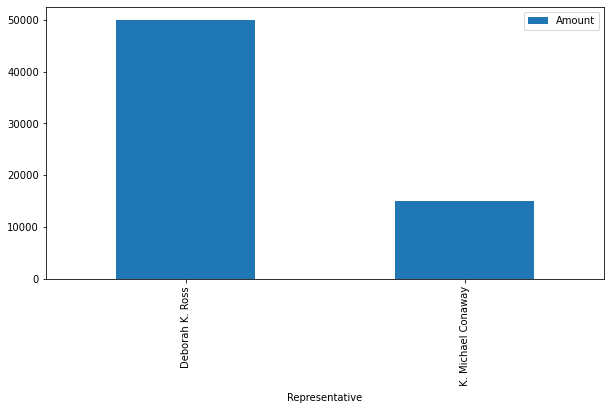

In [78]:
spy_df.plot.bar(figsize = [10,5])

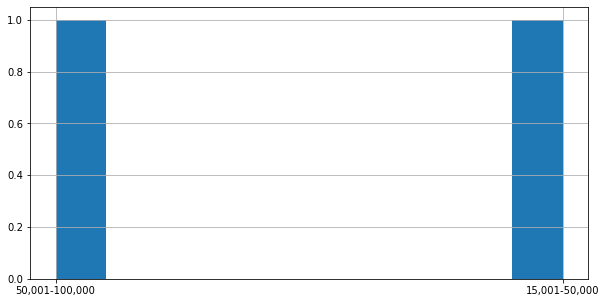

In [286]:
spy_df.Range.hist(figsize = [10,5]);

In [306]:
alpaca = tradeapi.REST(API_KEYS, API_SEC_KEY, api_version="v2")

In [307]:
timeframesios = "1D"

In [308]:
df_portfolio = alpaca.get_barset(['JNJ', "TSLA", "SPY"], timeframe=timeframesios, start="2020-02-08", end="2021-02-08").df

In [309]:
df_portfolio.head()

JNJ                                        \
                             open      high       low   close    volume   
time                                                                      
2021-01-12 00:00:00-05:00  159.15  159.6600  157.3300  158.13  11299335   
2021-01-13 00:00:00-05:00  158.23  158.4550  156.7500  157.89   8877839   
2021-01-14 00:00:00-05:00  160.45  161.9500  159.6100  160.60   8489789   
2021-01-15 00:00:00-05:00  160.30  161.4058  159.1058  160.26   7191604   
2021-01-19 00:00:00-05:00  162.00  163.0400  161.1000  162.78   6381117   

                              SPY                                      TSLA  \
                             open    high     low   close    volume    open   
time                                                                          
2021-01-12 00:00:00-05:00  378.89  379.86  376.36  378.81  45364896  831.00   
2021-01-13 00:00:00-05:00  378.69  380.86  377.85  379.76  38355050  852.76   
2021-01-14 00:00:00-05:00  380.59  381.13  378.10  378.45  41045335  843.39   
2021-01-15 00:00:00-05:00  376.72  377.58  373.70  375.68  78405054  852.00   
2021-01-19 00:00:00-05:00  378.34  379.23  376.75  378.63  42257108  837.80   

                                                             
                             high     low   close    volume  
time                                                         
2021-01-12 00:00:00-05:00  868.00  827.34  849.22  43550554  
2021-01-13 00:00:00-05:00  860.47  832.00  854.42  31050197  
2021-01-14 00:00:00-05:00  863.00  838.75  844.21  29982086  
2021-01-15 00:00:00-05:00  859.90  819.10  826.16  36516827  
2021-01-19 00:00:00-05:00  850.00  833.00  844.50  23300603